# Setting up directories


In [1]:

!pip install kaggle



In [2]:
from google.colab import files
files.upload()



Saving kaggle (7).json to kaggle (7).json


{'kaggle (7).json': b'{"username":"ayush1112","key":"927756b81fa7da2f30a1cf9f1437a47d"}'}

# connecting to kaggle json

In [3]:
!mv "kaggle (7).json" kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



# Getting and unziping the dataset

In [4]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT


In [5]:
!unzip brain-tumor-classification-mri.zip -d brain_tumor_dataset


Archive:  brain-tumor-classification-mri.zip
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: brain_tumor_dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: brain_tumor_dataset/Testing/gliom

# Importing packages

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Rescaling

import tensorflow as tf
import os
import glob


# For reproducibility
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

seed = 123
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# General Dataset information

In [7]:
# Setup the paths to train and test images
glioma_tumor_DIR = '/content/brain_tumor_dataset/Training/glioma_tumor'
meningioma_DIR = '/content/brain_tumor_dataset/Training/meningioma_tumor'
no_tumor_DIR ='/content/brain_tumor_dataset/Training/no_tumor'
pituitary_tumor_DIR ='/content/brain_tumor_dataset/Training/pituitary_tumor'

# Glob the directories and get the lists of train and test images
glioma_tumor_fns = glob.glob( glioma_tumor_DIR + '/*')
meningioma_fns = glob.glob(meningioma_DIR + '/*')
no_tumor_fns = glob.glob(no_tumor_DIR + '/*')
pituitary_tumor_fns = glob.glob(pituitary_tumor_DIR + '/*')




In [8]:
print('Number of glioma tumor images is {}'.format(len(glioma_tumor_fns)))
print('Number of meningioma images is {}'.format(len(meningioma_fns)))
print('Number of no tumor images is {}'.format(len(no_tumor_fns)))
print('Number of pituitary tumor images is {}'.format(len(pituitary_tumor_fns)))

Number of glioma tumor images is 826
Number of meningioma images is 822
Number of no tumor images is 395
Number of pituitary tumor images is 827


In [9]:
# Set base directory for dataset
BASE_DIR = '/content/brain_tumor_dataset'


In [10]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


In [11]:
X_train = []
y_train = []
image_size = 150

In [12]:
train_dataset = '/content/brain_tumor_dataset/Training'
test_dataset = '/content/brain_tumor_dataset/Testing'

In [13]:
from tqdm import tqdm
import cv2
for i in labels:
    folderPath = os.path.join(train_dataset,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join(test_dataset,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 225.36it/s]


# Data visualization


<ipython-input-14-5f06da57f88d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


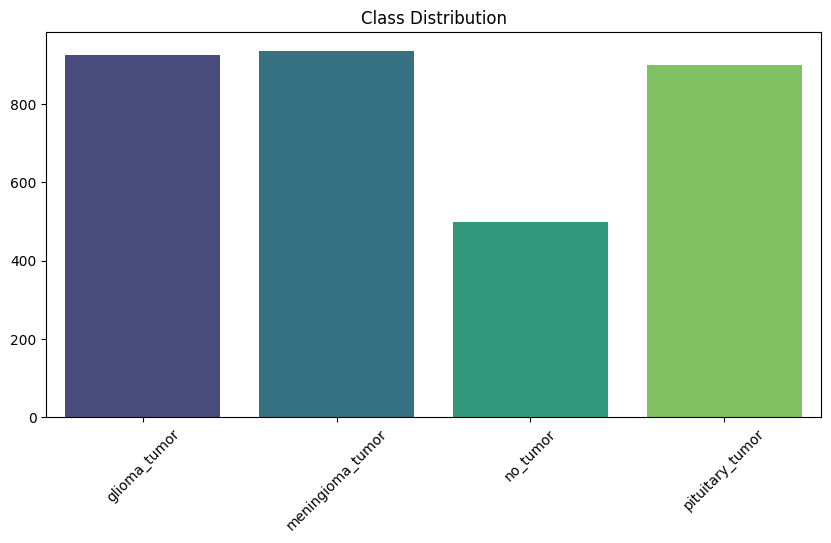

In [14]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=unique, y=counts, palette="viridis")

plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

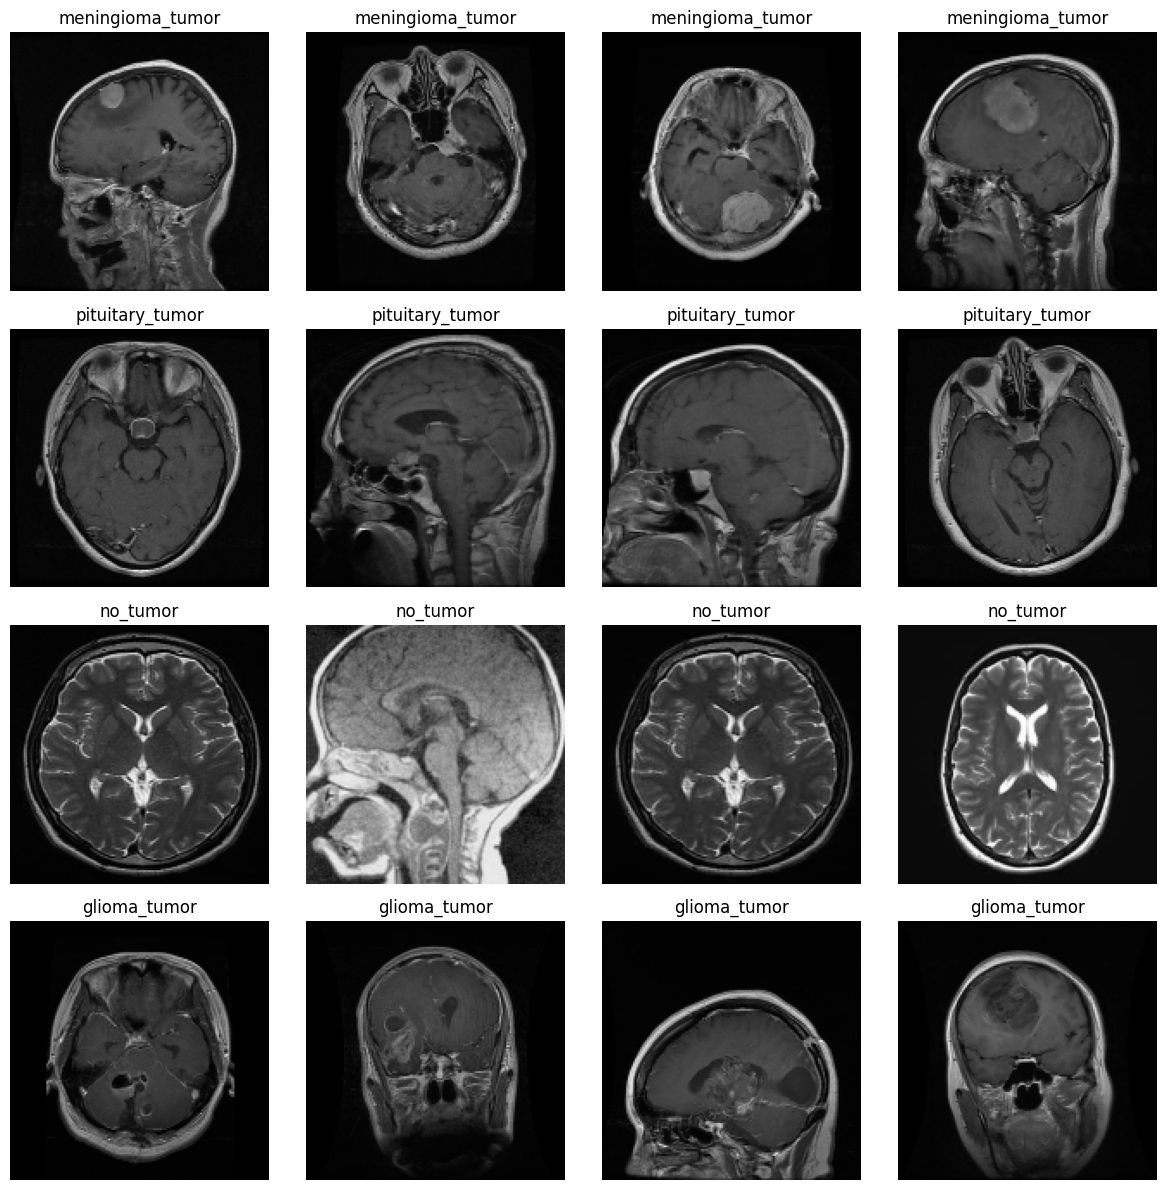

In [15]:
import matplotlib.pyplot as plt

# Dictionary to store multiple samples per class
class_samples = {label: [] for label in set(y_train)}

# Collect 4 images per class
for img, label in zip(X_train, y_train):
    if len(class_samples[label]) < 4:  # Collect up to 4 images per class
        class_samples[label].append(img)

# Plot images
plt.figure(figsize=(12, 12))

for i, (label, images) in enumerate(class_samples.items()):
    for j in range(4):  # Show 4 images per class
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(images[j])
        plt.title(label)
        plt.axis("off")

plt.tight_layout()
plt.show()


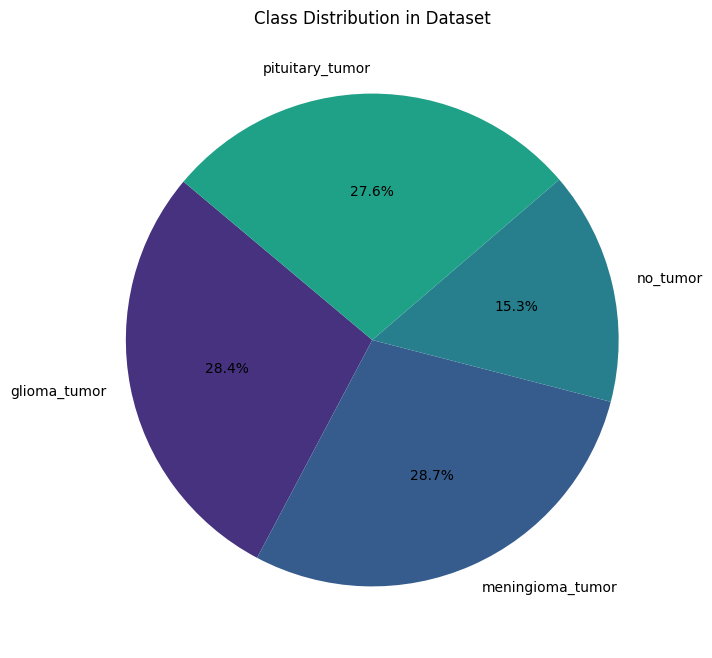

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique, autopct="%1.1f%%", colors=sns.color_palette("viridis"), startangle=140)
plt.title("Class Distribution in Dataset")
plt.show()


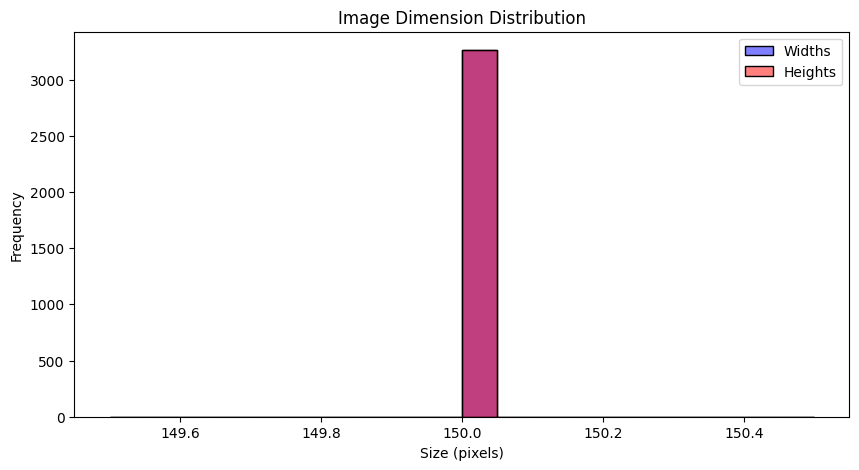

In [17]:
widths, heights = [], []

for img in X_train:
    h, w, _ = img.shape
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(10, 5))
sns.histplot(widths, color="blue", kde=True, label="Widths", bins=20)
sns.histplot(heights, color="red", kde=True, label="Heights", bins=20)

plt.title("Image Dimension Distribution")
plt.xlabel("Size (pixels)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


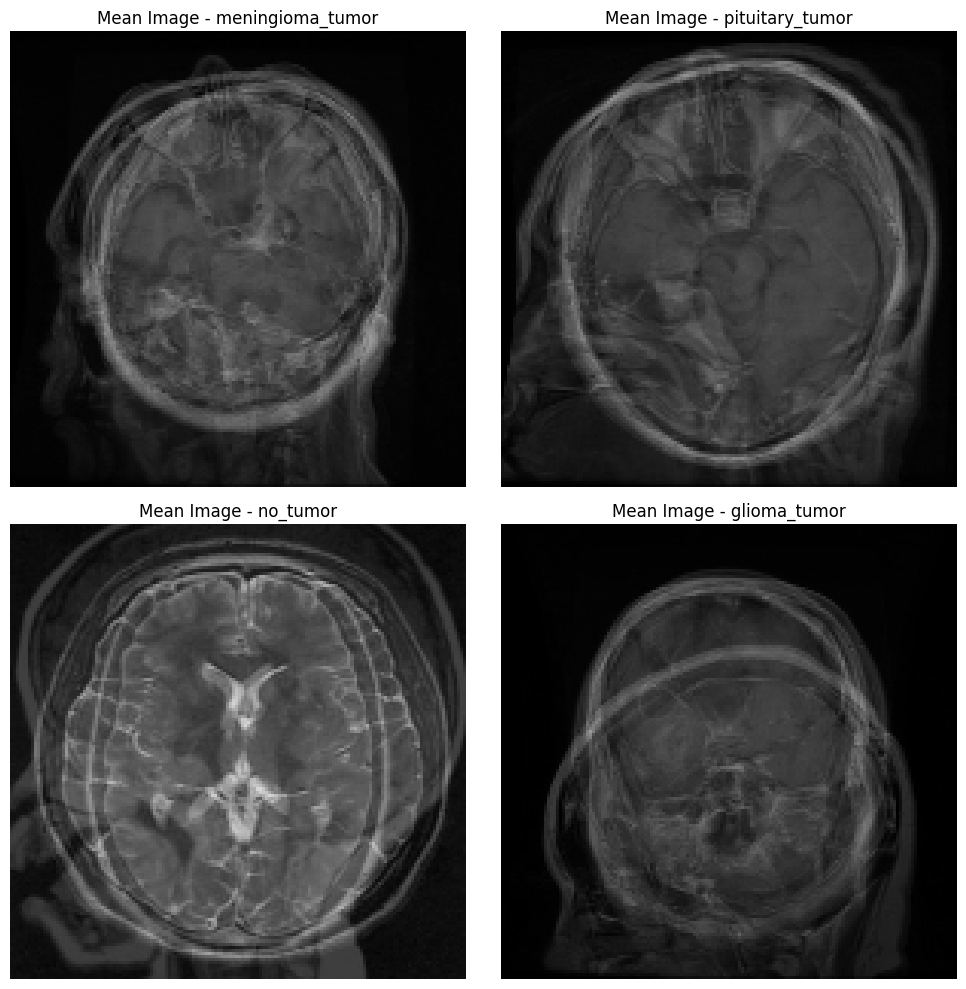

In [18]:
plt.figure(figsize=(10, 10))

for i, (label, images) in enumerate(class_samples.items()):
    mean_img = np.mean(np.array(images), axis=0).astype(np.uint8)  # Compute mean image
    plt.subplot(2, 2, i + 1)
    plt.imshow(mean_img)
    plt.title(f"Mean Image - {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()



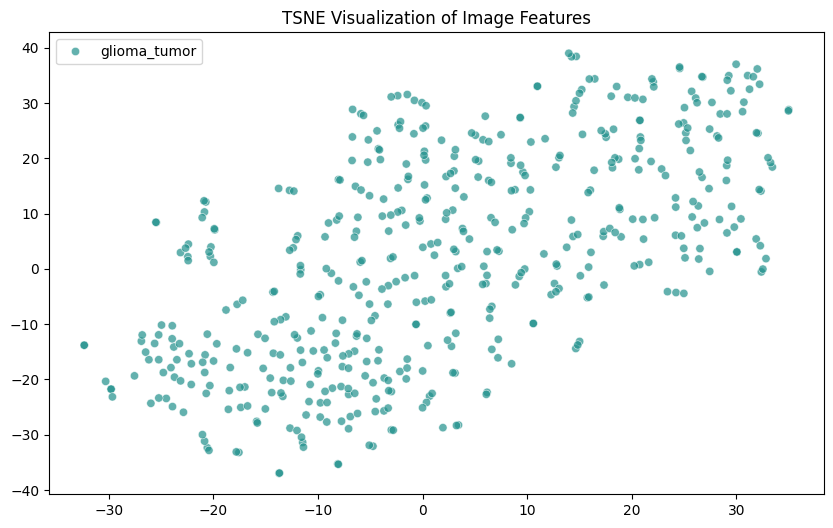

In [19]:
from sklearn.manifold import TSNE

# Flatten images for TSNE (Only use a subset to avoid high computation)
subset_size = 500
X_flat = X_train[:subset_size].reshape(subset_size, -1)
y_subset = y_train[:subset_size]

# Reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_flat)

# Plot TSNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_subset, palette="viridis", alpha=0.7)
plt.title("TSNE Visualization of Image Features")
plt.legend()
plt.show()


# Data preparation


In [20]:
# Set up directory and parameters
train_dir = '/content/brain_tumor_dataset/Training'
img_size = (150,150)  # for custom cnn model
batch_size = 32  # Adjust batch size as per your GPU capacity

In [21]:
# Data Augmentation Layers (Applied During Training)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),  # Horizontal Flip
    layers.RandomRotation(0.1),  # Small Random Rotation (10%)
    layers.RandomZoom(0.1),  # Small Random Zoom (10%)
    layers.RandomBrightness(factor=0.2),  # Adjust brightness
    layers.RandomContrast(factor=0.2),  # Adjust contrast
])

# Flow from directory

In [22]:
# Load training and validation datasets using image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    validation_split=0.2,  # 80/20 split for training/validation
    subset="training",
    seed=123,  # For reproducibility
    image_size=img_size,
    batch_size=batch_size
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [23]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    labels = 'inferred',
    label_mode = 'categorical',
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model architecture
def create_cnn_model(input_shape=(150, 150, 3), num_classes=5):
    model = models.Sequential()

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.3))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.3))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.3))

    # Convolutional Block 4
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Dropout(0.3))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer

    return model

# Instantiate the model
model = create_cnn_model(input_shape=(150, 150, 3), num_classes=4)

# Display the model architecture
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the model
model.compile(
    optimizer='adam',  # You can experiment with different optimizers
    loss='categorical_crossentropy',  # Suitable for integer-encoded labels
    metrics=['accuracy']
)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Model checkpoint to save the best model
checkpoint = ModelCheckpoint(
    'best_cnn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Combine callbacks
callbacks = [early_stop, checkpoint, reduce_lr]

In [27]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 297ms/step - accuracy: 0.3051 - loss: 2.9098 - val_accuracy: 0.4843 - val_loss: 1.1493
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5276 - loss: 1.0913 - val_accuracy: 0.6220 - val_loss: 0.8834
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6164 - loss: 0.8825 - val_accuracy: 0.6446 - val_loss: 0.8183
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6699 - loss: 0.7742 - val_accuracy: 0.7073 - val_loss: 0.7380
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.6967 - loss: 0.6835 - val_accuracy: 0.6707 - val_loss: 0.6781
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.7265 - loss: 0.5883 - val_accuracy: 0.7683 - val_loss: 0.5974
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.8060 - loss: 0.5076 - val_accuracy: 0.7927 - val_loss: 0.5266
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.8412 - loss: 0.3943 - val_accuracy: 0.7822

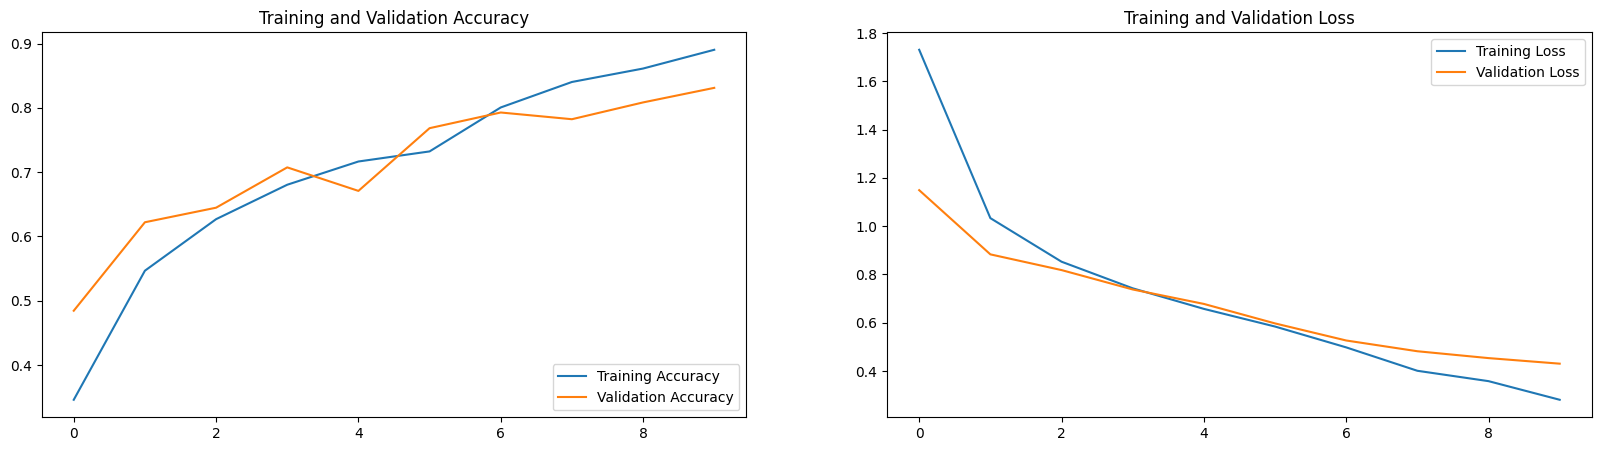

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluating the Model

In [35]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/brain_tumor_dataset/Testing'  # Path to your test directory

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='categorical',  # We do not need the labels here
    shuffle=False)  # Do not shuffle to maintain the order of files


Found 394 images belonging to 4 classes.


In [36]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.4182 - loss: 1.5806
Test Loss: 1.8988926410675049
Test Accuracy: 0.3071065843105316


# making prediction


In [37]:
np.ceil(test_generator.samples/test_generator.batch_size)

np.float64(20.0)

In [38]:
probabilities = model.predict(test_generator)
probabilities

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


array([[1.3877749e-01, 2.8911000e-01, 5.6744844e-01, 4.6641170e-03],
       [2.2347158e-01, 5.5967808e-01, 1.8228494e-01, 3.4565434e-02],
       [5.1464658e-02, 8.0875850e-01, 1.2717660e-01, 1.2600352e-02],
       ...,
       [2.7222937e-01, 6.1731285e-01, 1.0559675e-01, 4.8610340e-03],
       [3.8844991e-01, 4.5478541e-01, 1.4770788e-01, 9.0567954e-03],
       [7.6502949e-01, 9.5689081e-02, 1.3917193e-01, 1.0946247e-04]],
      dtype=float32)

In [40]:
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))
probabilities

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


array([[1.3877749e-01, 2.8911000e-01, 5.6744844e-01, 4.6641170e-03],
       [2.2347158e-01, 5.5967808e-01, 1.8228494e-01, 3.4565434e-02],
       [5.1464658e-02, 8.0875850e-01, 1.2717660e-01, 1.2600352e-02],
       ...,
       [2.7222937e-01, 6.1731285e-01, 1.0559675e-01, 4.8610340e-03],
       [3.8844991e-01, 4.5478541e-01, 1.4770788e-01, 9.0567954e-03],
       [7.6502949e-01, 9.5689081e-02, 1.3917193e-01, 1.0946247e-04]],
      dtype=float32)

In [44]:
# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size))) # calculate steps to cover all samples

# Get the index of the highest probability class for each prediction
predicted_classes = np.argmax(probabilities, axis=1)

# To match with the filenames or other identifiers, you can extract the file names from the generator
filenames = test_generator.filenames

# If you need the actual class labels instead of 0/1, you can map the predicted classes back to the original labels
class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]

# Ensure both lists have the same length before iterating
min_len = min(len(filenames), len(predicted_labels))

# Now you can inspect the results:
for i in range(min_len): # Use min_len to iterate safely
    print(f"File: {filenames[i]} - Predicted: {predicted_labels[i]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
File: glioma_tumor/image(1).jpg - Predicted: no_tumor
File: glioma_tumor/image(10).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(100).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(11).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(12).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(13).jpg - Predicted: glioma_tumor
File: glioma_tumor/image(14).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(15).jpg - Predicted: glioma_tumor
File: glioma_tumor/image(16).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(17).jpg - Predicted: no_tumor
File: glioma_tumor/image(18).jpg - Predicted: glioma_tumor
File: glioma_tumor/image(19).jpg - Predicted: meningioma_tumor
File: glioma_tumor/image(2).jpg - Predicted: no_tumor
File: glioma_tumor/image(20).jpg - Predicted: glioma_tumor
File: glioma_tumor/image(21).jpg - Predicted: glioma_tumor
File: glioma_tumor/image(22).jpg - Predicted: no_tumor
File:

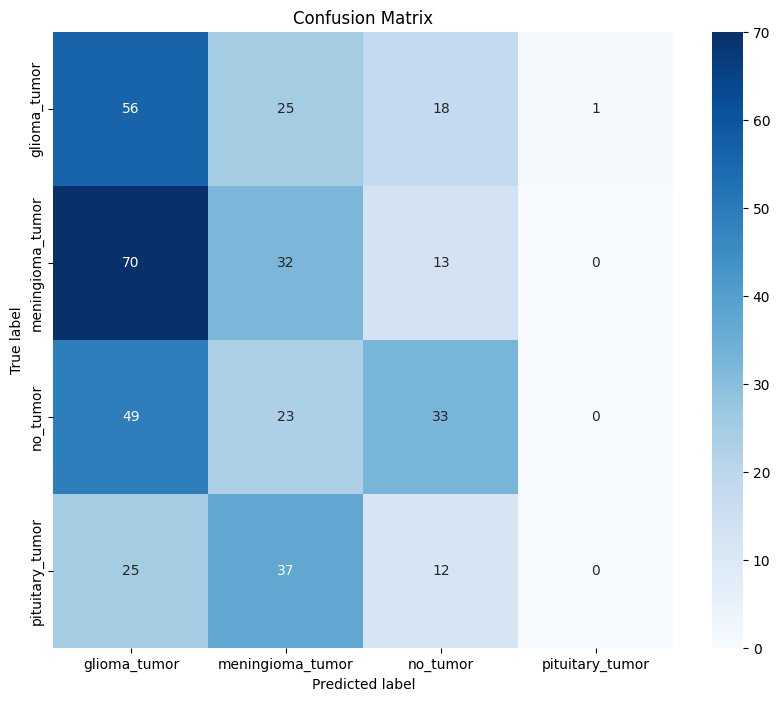

In [46]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# Get the true labels from the test generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
